In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import random

df = pd.read_csv("Spotify.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration          2000 non-null   int64  
 3   year              2000 non-null   int64  
 4   popularity        2000 non-null   int64  
 5   danceability      2000 non-null   float64
 6   energy            2000 non-null   float64
 7   key               2000 non-null   int64  
 8   loudness          2000 non-null   float64
 9   mode              2000 non-null   int64  
 10  speechiness       2000 non-null   float64
 11  acousticness      2000 non-null   float64
 12  instrumentalness  2000 non-null   float64
 13  liveness          2000 non-null   float64
 14  valence           2000 non-null   float64
 15  tempo             2000 non-null   float64
dtypes: float64(9), int64(5), object(2)
memory 

In [2]:
# No Null Values 
print(df.isnull().values.any())
print(df.isnull().sum().sum())

False
0


In [3]:
# Drop 1s and 0s 
# 127 values dropped
values = [0]
df = df[df.popularity.isin(values) == False]
df

,artist,song,duration,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Britney Spears,Oops!...I Did It Again,211160,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053
1,blink-182,All The Small Things,167066,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726
2,Faith Hill,Breathe,250546,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859
3,Bon Jovi,It's My Life,224493,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992
4,*NSYNC,Bye Bye Bye,200560,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958
1996,Taylor Swift,Cruel Summer,178426,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994
1997,Blanco Brown,The Git Up,200593,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998


In [4]:
df['duration_s'] = df['duration'].apply(lambda x: round(x/1000))

In [5]:
df.min()

artist                  *NSYNC
song                #thatPOWER
duration                113000
year                      1998
popularity                   1
danceability             0.129
energy                  0.0549
key                          0
loudness               -20.514
mode                         0
speechiness             0.0232
acousticness          0.000021
instrumentalness           0.0
liveness                0.0215
valence                 0.0406
tempo                   60.019
duration_s                 113
dtype: object

<AxesSubplot:>

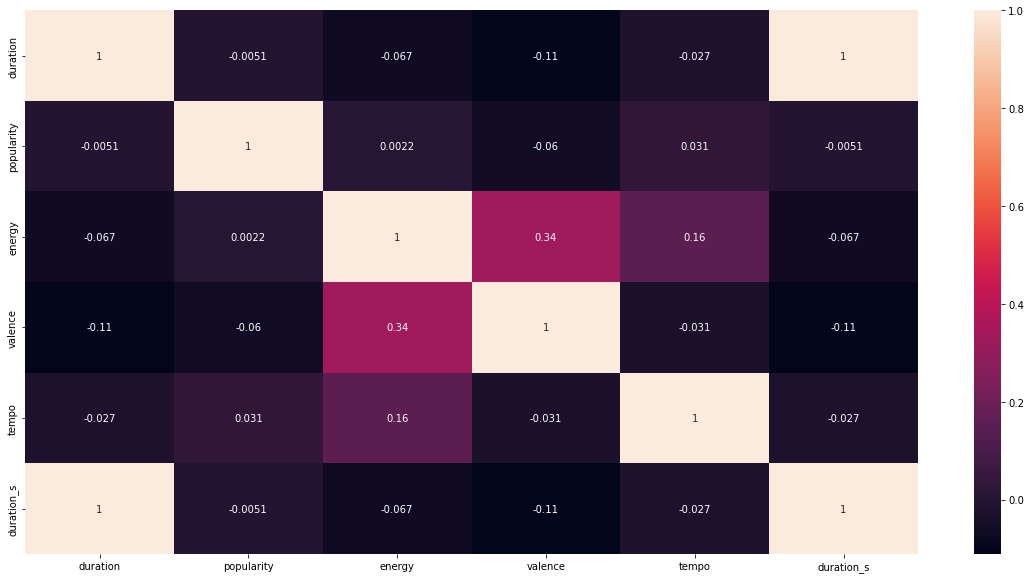

In [56]:
# 0 correlation

cor = df.corr()

plt.figure(figsize = (20,10))
sns.heatmap(data = cor, annot = True)

In [7]:
df.drop(columns = ['artist','song','year','danceability','loudness','mode','speechiness','acousticness','instrumentalness','liveness','key'], axis =1 , inplace =True)


In [8]:
df

,duration,popularity,energy,valence,tempo,duration_s
0,211160,77,0.834,0.894,95.053,211
1,167066,79,0.897,0.684,148.726,167
2,250546,66,0.496,0.278,136.859,251
3,224493,78,0.913,0.544,119.992,224
4,200560,65,0.928,0.879,172.656,201
...,...,...,...,...,...,...
1995,181026,79,0.734,0.952,137.958,181
1996,178426,78,0.702,0.564,169.994,178
1997,200593,69,0.678,0.811,97.984,201
1998,171029,75,0.520,0.347,102.998,171


In [9]:
# normalize

for column in df.columns:
    df[column] = (df[column] - df[column].min())/(df[column].max() - df[column].min())



In [10]:
# Test/Train Split
def testTrainSplit(df):
  length = len(df.index)
  splitLimit = int(length * 0.7)
  train = df[0: splitLimit]
  test = df[splitLimit + 1: length]
  return train, test
    

In [11]:
train,test = testTrainSplit(df)

In [15]:
# duration, popularity, valence, tempo

def sumOfDist(w1,w2,w3,b,train):
    sum = 0
    for row in range(0, len(train.index)):
        x1 = train.iat[row, 0]
        x2 = train.iat[row,2]
        x3 = train.iat[row,3]
        
        distance = (abs((w1 * x1) + (w2 *x2) + (w3 * x3) + b))/(math.sqrt((w1*w1) + (w2*w2))) #distance formula
        sum = sum + distance
        
    return sum
    

In [54]:
def trainMultipleRegression(train):
    count = 0
    slope1 = {}
    slope2 = {}
    yint = {}
        
    while count < 2000:
        
        w1 =  float(random.uniform(-0.5,0.5))  # Slope! #change this
        w2 =  float(random.uniform(-0.5,0.5))
        w3 = float(random.uniform(-0.5,0.5))#change this
        b = float(random.uniform(-0.5,0.5))
        sum1 = sumOfDist(w1,w2,w3,b,train)
        
        slope1[w1,w2,w3,b] = sum1
        # slope2[w2] = sum2
        count = count + 1
        
        
    return slope1

In [55]:
dict(sorted(trainMultipleRegression(train).items(), key=lambda item: item[1]))

{(-0.4365935924470101,
  -0.29771014237836535,
  0.022196955646685113,
  0.33893520778822417): 113.68850432375292,
 (-0.2689943698619932,
  0.07829525747901833,
  -0.03351539671524939,
  0.054174645529532106): 113.85048162527322,
 (0.4962298660351022,
  0.13709816352182935,
  -0.0924478542867343,
  -0.19440191995424871): 113.9566978250729,
 (0.40011611843289985,
  0.05322772632361494,
  -0.02613167825426166,
  -0.1305545968136943): 116.37374752878577,
 (0.4546975404943173,
  -0.2653929367347886,
  0.05865134031502284,
  0.01415468824637911): 128.74621026124754,
 (0.45960505783729977,
  0.05973302752604437,
  -0.021089134463710302,
  -0.14390996827470504): 131.20816800109841,
 (0.4814248256530078,
  0.2051929767748678,
  -0.12603530365840188,
  -0.19881985660833434): 137.3417308977344,
 (0.39588373745845673,
  0.24060394233773053,
  -0.04410169787175999,
  -0.3119466481847364): 138.47495780437285,
 (0.3861390761802632,
  0.32717114395226876,
  -0.18500512785593504,
  -0.2640434783018179

In [ ]:
w1 = -0.4365935924470101
w2 = -0.29771014237836535
w3 = 0.022196955646685113
b = 0.33893520778822417
dist = 113.68850432375292
